In [34]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [35]:
# Importing the dataset created previously by mergin Rating, Tag, User files
user_rating=pd.read_csv("movie_integrate.csv") # File containing data of each user along with rating and movies he/she reviewed
movie_rating=pd.read_csv("movie_ratings.csv") # File containing movie details along with users and rating who reviewed that perticular movie 


In [36]:
#Dataype of user_rating 
user_rating.dtypes

Unnamed: 0     int64
userId         int64
Age            int64
Sex           object
occupation    object
Zip           object
Movie_id      object
Ratings       object
dtype: object

In [37]:
#Some Empty data from previous file removing the empty data
user_rating=user_rating.iloc[:610]

In [38]:
# User Dataframe overview.In this assignment we will only work with user_rating table 
user_rating.head()

,Unnamed: 0,userId,Age,Sex,occupation,Zip,Movie_id,Ratings
0,0,1,24,M,technician,85711,[ 1 3 6 47 50 70 101 110 151 ...,[4. 4. 4. 5. 5. 3. 5. 4. 5. 5. 5. 5. 3. 5. 4. ...
1,1,2,53,F,other,94043,[ 318 333 1704 3578 6874 8798 46...,[3. 4. 4.5 4. 4. 3.5 4. 4. 4.5 5. 4.5 3...
2,2,3,23,M,writer,32067,[ 31 527 647 688 720 849 914 10...,[0.5 0.5 0.5 0.5 0.5 5. 0.5 0.5 0.5 0.5 0.5 3...
3,3,4,24,M,technician,43537,[ 21 32 45 47 52 58 106 125 126 ...,[3. 2. 3. 2. 3. 3. 4. 5. 1. 5. 3. 5. 2. 5. 1. ...
4,4,5,33,F,other,15213,[ 1 21 34 36 39 50 58 110 150 153 232 2...,[4. 4. 4. 4. 3. 4. 5. 4. 3. 3. 4. 5. 3. 4. 3. ...


In [39]:
# Movie rating dataframe overview
movie_rating.head()

,Unnamed: 0,movieId,title,genres,tag,imdbId,tmdbId,Users,Ratings
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,['pixar' 'pixar' 'fun'],114709,862.0,[ 1 5 7 15 17 18 19 21 27 31 32 ...,[4. 4. 4.5 2.5 4.5 3.5 4. 3.5 3. 5. 3. 3...
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,['fantasy' 'magic board game' 'Robin Williams'...,113497,8844.0,[ 6 8 18 19 20 21 27 51 62 68 82 ...,[4. 4. 3. 3. 3. 3.5 4. 4.5 4. 2.5 3. 3...
2,2,3,Grumpier Old Men (1995),Comedy|Romance,['moldy' 'old'],113228,15602.0,[ 1 6 19 32 42 43 44 51 58 64 68 ...,[4. 5. 3. 3. 4. 5. 3. 4. 3. 3.5 2. 3...
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,[],114885,31357.0,[ 6 14 84 162 262 411 600],[3. 3. 3. 3. 1. 2. 1.5]
4,4,5,Father of the Bride Part II (1995),Comedy,['pregnancy' 'remake'],113041,11862.0,[ 6 31 43 45 58 66 68 84 103 107 111 1...,[5. 3. 5. 3. 4. 4. 2. 3. 4. 4. 3.5 3...


## creating two separate Dataframe(male_user,female_user) to analize the male and female rating differece


In [40]:
#Creating different dataframe for male users 
male_user=user_rating[user_rating["Sex"]=='M']

In [41]:
#Separating female users data from main data
female_user=user_rating[user_rating["Sex"]=='F']

In [42]:
#There are less Female review in compare to male
print(len(female_user))
print(len(male_user))

170
440


In [43]:
#Male user DataFrame overview
male_user.head()

,Unnamed: 0,userId,Age,Sex,occupation,Zip,Movie_id,Ratings
0,0,1,24,M,technician,85711,[ 1 3 6 47 50 70 101 110 151 ...,[4. 4. 4. 5. 5. 3. 5. 4. 5. 5. 5. 5. 3. 5. 4. ...
2,2,3,23,M,writer,32067,[ 31 527 647 688 720 849 914 10...,[0.5 0.5 0.5 0.5 0.5 5. 0.5 0.5 0.5 0.5 0.5 3...
3,3,4,24,M,technician,43537,[ 21 32 45 47 52 58 106 125 126 ...,[3. 2. 3. 2. 3. 3. 4. 5. 1. 5. 3. 5. 2. 5. 1. ...
5,5,6,42,M,executive,98101,[ 2 3 4 5 6 7 8 10 11 ...,[4. 5. 3. 5. 4. 4. 3. 3. 4. 3. 4. 4. 4. 2. 2. ...
6,6,7,57,M,administrator,91344,[ 1 50 58 150 165 260 356 3...,[4.5 4.5 3. 4.5 4. 5. 5. 3. 5. 5. 2. 3...


In [44]:
#Female user Dataframe overview
female_user.head()

,Unnamed: 0,userId,Age,Sex,occupation,Zip,Movie_id,Ratings
1,1,2,53,F,other,94043,[ 318 333 1704 3578 6874 8798 46...,[3. 4. 4.5 4. 4. 3.5 4. 4. 4.5 5. 4.5 3...
4,4,5,33,F,other,15213,[ 1 21 34 36 39 50 58 110 150 153 232 2...,[4. 4. 4. 4. 3. 4. 5. 4. 3. 3. 4. 5. 3. 4. 3. ...
10,10,11,39,F,other,30329,[ 6 10 36 44 95 110 150 153 165 ...,[5. 3. 4. 2. 3. 5. 5. 3. 3. 4. 3. 4. 4. 5. 5. ...
11,11,12,28,F,other,06405,[ 39 168 222 256 261 277 357 5...,[4. 5. 5. 5. 4.5 3. 3.5 3.5 4. 5. 4.5 3...
14,14,15,49,F,educator,97301,[ 1 44 47 158 172 256 ...,[2.5 1. 3.5 1. 1. 3. 5. 3. 4. 5. 1. 5...


In [45]:
#Getting all the ratings from Female Rating Columns
female=female_user["Ratings"].values
female=str(female)
#Rating data is Object datatypes so it containing some noice e.g. \n,',[,],..etc 
#Removing the noice  
female=female.replace("\n "," ")
female=female.replace("\\n"," ")
female=female.replace("'","")
female=female.replace("[","")
female=female.replace("]","")
female=female.replace("  "," ")
female=female.replace("...","")

#Spliting the data and making a new female List to store all ratings
female=str(female).split(" ")
while("" in female):
    female.remove("")

In [47]:
#Converting Female List to numpy array
female=np.array(female)
#Storing the unique value and there frequency in the Array 
female_unique=np.unique(female,return_counts=True)
#Sorting the female rating data for ease of plotting
female=np.sort(female)

In [48]:
#Getting all the ratings from Female Rating Columns
male=male_user["Ratings"].values
male=str(male)
#Rating data is Object datatypes so it containing some noice e.g. \n,',[,],..etc 
male=male.replace("\n "," ")
male=male.replace("\\n"," ")
male=male.replace("'","")
male=male.replace("[","")
male=male.replace("]","")
male=male.replace("  "," ")
male=male.replace("...","")
#Spliting the data and making a new  Male List to store all ratings
male=str(male).split(" ")
while("" in male):
    male.remove("")

In [49]:
#Converting Female List to numpy array
male=np.array(male)
#Storing the unique value and there frequency in the Array 
male_unique=np.unique(male,return_counts=True)
#Sorting the female rating data for ease of plotting
male=np.sort(male)

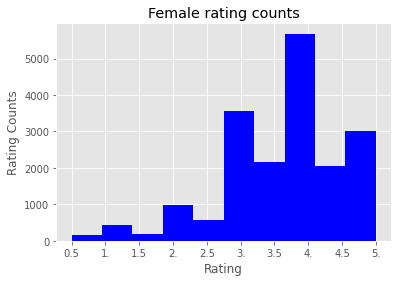

In [50]:
#Plotting the Count of rating given by Female users for movie
style.use("ggplot")
plt.hist(female,color='b')
plt.ylabel("Rating Counts")
plt.xlabel("Rating")
plt.title("Female rating counts")
plt.show()

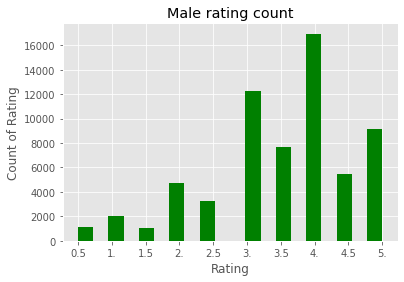

In [51]:
#Plotting the Count of rating given by Male users for movie
style.use("ggplot")
plt.hist(male,bins=20,color='g')
plt.xlabel("Rating")
plt.ylabel("Count of Rating")
plt.title("Male rating count")
plt.show()

### By analysing both the charts There is Difference in the Female and Male rating counts because male count is high
### We will plot Rating count according to the percentage now to understand the difference 

In [52]:
#Sum of all the no. of ratings givin by male users
total_male_rating=sum(male_unique[1])
#Calculating the male percentage for each rating
male_percentage=[(float(i)/float(total_male_rating))*100 for i in male_unique[1]]
#converting male percentage list into numpy array
male_percentage=np.array(male_percentage)
male_percentage = male_percentage.astype(float)

In [53]:
#Sum of all the no. of ratings givin by male users
total_female_rating=sum(female_unique[1])
#Sum of all the no. of ratings givin by male users
female_percentage=[(float(i)/float(total_female_rating))*100 for i in female_unique[1]]
#converting male percentage list into numpy array
female_percentage=np.array(female_percentage)
female_percentage = female_percentage.astype(float)

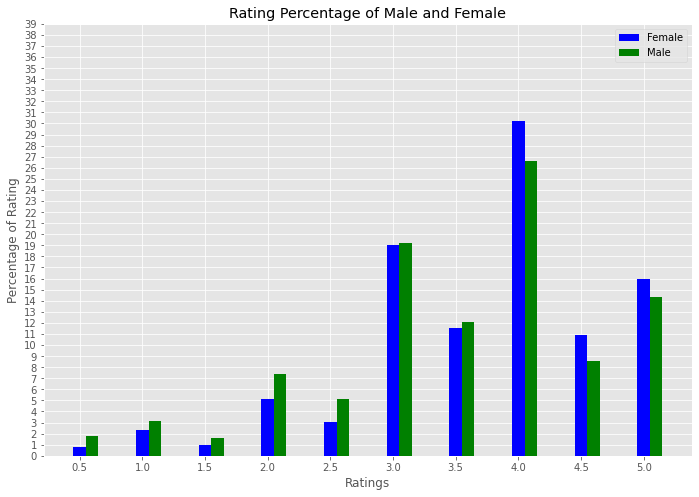

In [55]:
#Plotting bar chart to visualize Male and Female Rating percentage 

X = female_unique[0].astype(float)
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(X,female_percentage , color = 'b', width = 0.1)
ax.bar(X + 0.1, male_percentage, color = 'g', width = 0.1)
ax.set_ylabel('Percentage of Rating')
ax.set_xlabel('Ratings')
ax.set_title('Rating Percentage of Male and Female')
ax.set_xticks(X)
ax.set_yticks(np.arange(0, 40, 1))
ax.legend(labels=['Female', 'Male'])
plt.show()

### We can clearly see that difference there is no big difference between male and Female on the rating ratio 